# Assignment 1

First we need to import a few modules, execute the cell below:

In [2]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [8]:
def f(x):
    '''Function equivalent to cos(x), should work for one argument or a numpy array'''
    # YOUR CODE HERE
    return numpy.cos(x)

You can use the following cell to check that your code works for scalar arguments:

In [4]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [5]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [4]:
def df_analytic(x):
    '''
    The analytic derivative
    '''
    # YOUR CODE HERE
    return -numpy.sin(x)

In [27]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

-0.479425538604203


In [12]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [5]:
def backward_difference(f, x, dx):
    '''
    This function implements the backward difference method for the 
    first derivative of the function f at position x using interval
    dx.
    '''
    # YOUR CODE HERE
    numerator = f(x) - f(x-dx)
    return (numerator/dx)

In [23]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


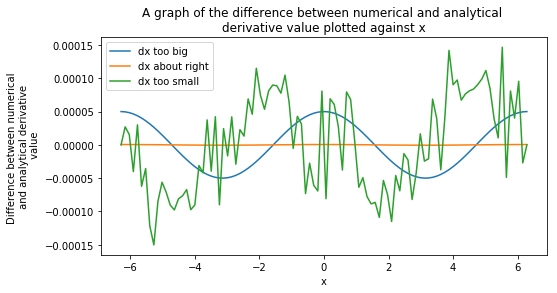

In [16]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_1 = backward_difference(f, xs, dx=1e-4)
df_dx_2 = backward_difference(f, xs, dx=1e-6)
df_dx_3 = backward_difference(f, xs, dx=1e-12)
df_dx_analytical = df_analytic(xs)
plt.figure(figsize=(8, 4))
plt.xlabel('x')
plt.ylabel('Difference between numerical \n and analytical derivative \n value')
plt.title('A graph of the difference between numerical and analytical \nderivative value plotted against x')
plt.plot(xs, df_dx_1 - df_dx_analytical, label = 'dx too big')
plt.plot(xs, df_dx_2 - df_dx_analytical, label = 'dx about right')
plt.plot(xs, df_dx_3 - df_dx_analytical, label = 'dx too small')
plt.legend()

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


Accuracy is lost due to the large difference in magnitude between x and dx when dx is too small. For example, if x = 1 and dx = 0.0123456789. The computer can only store a number with a finite number of decimal places, for example 4 decimal places, before the 10^y where y is a power. This means that dx will be stored as 1.2346x10^-2, here accuracy is already lost from rounding to 4 dp. When this number is added to 1, it will become 1.0123x10^0. Dividing by dx again will mean that the answer has lost accuracy, both from adding x to dx and for the division, which will not be using the true value of dx, but the computer-stored value of dx. 

Similarly, issues can also be caused when dx is too large. For a large dx, the estimation of the slope at the tangent to a particular point will be worse, causing for there to be a difference from the numerical methods answer and the true derivative of a function. 